# **PyTorch ANN Project - DIABETIS PREDICTION**

---
---

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data**

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/INeuron | Tensorflow/Data/diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

---
---
## **EDA**

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# df_n = df
# df_n.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# df_n['Outcome'] = np.where(df_n['Outcome'] == 1, 'Diabetic', 'Non Diabetic')
# df_n.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


In [ ]:
# sns.pairplot(df_n)

---
---
## **Split Data - between Feature and Target**

In [ ]:
# Independent Feature
X = df.drop('Outcome', axis = 1).values

In [ ]:
# Dependent Feature
y = df['Outcome'].values

---
---
## **Split Data - between Train and Test**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(614, 8)
(154, 8)
(614,)
(154,)


---
---
## **Creating Tensors with PyTorch**

In [ ]:
# Include PyTorch Libraries

import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Creating Tensors with PyTorch

X_train = torch.FloatTensor(X_train)
X_test  = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test  = torch.LongTensor(y_test)

---
---
## **Creating Model with PyTorch**

In [ ]:
class ANN_model(nn.Module):
  def __init__(self, input_features=8, hidden1=20, hidden2=20, out_features = 2):
    super().__init__()
    self.f_connected1 = nn.Linear(input_features, hidden1)
    self.f_connected2 = nn.Linear(hidden1, hidden2)
    self.out = nn.Linear(hidden2, out_features)

  def forward(self, x):
    x = F.relu(self.f_connected1(x))
    x = F.relu(self.f_connected2(x))
    x = self.out(x)
    return x

---
---
## **Instantiate ANN Model**

In [ ]:
torch.manual_seed(20)
model = ANN_model()

In [ ]:
model.parameters

<bound method Module.parameters of ANN_model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

---
---
## **Backward Propagation -- Define Loss Function, Optimizer**

In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
epochs = 500
final_losses = []

for i in range(epochs):
  i = i+1
  y_pred = model.forward(X_train)
  loss = loss_function(y_pred, y_train)
  final_losses.append(loss)

  if i%10==1:
    print("Epoch number: {} and the loss: {}".format(i, loss.item()))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch number: 1 and the loss: 0.3193262815475464
Epoch number: 11 and the loss: 0.314121276140213
Epoch number: 21 and the loss: 0.31258195638656616
Epoch number: 31 and the loss: 0.3237625062465668
Epoch number: 41 and the loss: 0.33534377813339233
Epoch number: 51 and the loss: 0.34977957606315613
Epoch number: 61 and the loss: 0.315274715423584
Epoch number: 71 and the loss: 0.30741187930107117
Epoch number: 81 and the loss: 0.3038877248764038
Epoch number: 91 and the loss: 0.29986879229545593
Epoch number: 101 and the loss: 0.2972050905227661
Epoch number: 111 and the loss: 0.29837384819984436
Epoch number: 121 and the loss: 0.29936105012893677
Epoch number: 131 and the loss: 0.29171210527420044
Epoch number: 141 and the loss: 0.33276063203811646
Epoch number: 151 and the loss: 0.29052484035491943
Epoch number: 161 and the loss: 0.2912030816078186
Epoch number: 171 and the loss: 0.28638479113578796
Epoch number: 181 and the loss: 0.2829185426235199
Epoch number: 191 and the loss: 0

---
---
## **Plot Loss Function**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

RuntimeError: ignored

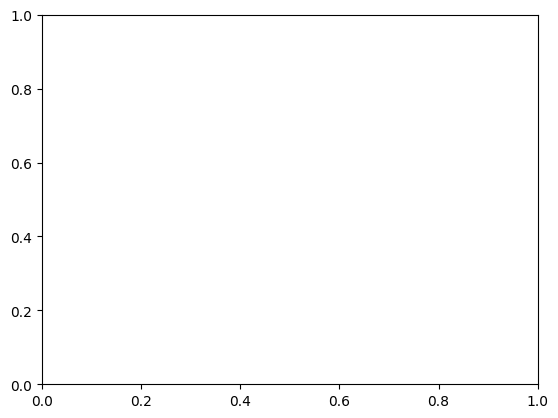

In [ ]:
plt.plot(range(epochs), final_losses.torch.tensor.detach())
plot.xlabel('Epoch')
plot.ylabel('Loss' )

---
---
## **Predictions in X_test data**

In [ ]:
predictions = []
for i, data  in enumerate(X_test):
  print(model(data))

tensor([-2.9695,  5.5057], grad_fn=<AddBackward0>)
tensor([2.6723, 0.9472], grad_fn=<AddBackward0>)
tensor([ 2.7875, -0.3991], grad_fn=<AddBackward0>)
tensor([1.8474, 0.6575], grad_fn=<AddBackward0>)
tensor([1.0138, 2.3977], grad_fn=<AddBackward0>)
tensor([-7.8259, 14.8956], grad_fn=<AddBackward0>)
tensor([ 2.9630, -2.3968], grad_fn=<AddBackward0>)
tensor([10.1233, -3.6226], grad_fn=<AddBackward0>)
tensor([1.6428, 1.9876], grad_fn=<AddBackward0>)
tensor([2.4904, 1.4681], grad_fn=<AddBackward0>)
tensor([ 3.6236, -1.8444], grad_fn=<AddBackward0>)
tensor([0.4180, 4.5605], grad_fn=<AddBackward0>)
tensor([ 2.6698, -0.5517], grad_fn=<AddBackward0>)
tensor([ 5.8432, -4.0676], grad_fn=<AddBackward0>)
tensor([ 2.9660, -0.5976], grad_fn=<AddBackward0>)
tensor([1.9044, 1.3620], grad_fn=<AddBackward0>)
tensor([ 3.9535, -1.3132], grad_fn=<AddBackward0>)
tensor([ 2.1972, -1.8441], grad_fn=<AddBackward0>)
tensor([4.1149, 3.1029], grad_fn=<AddBackward0>)
tensor([1.7084, 1.7617], grad_fn=<AddBackward0>

In [ ]:
predictions = []
with torch.no_grad():
  for i, data  in enumerate(X_test):
    y_pred = model(data)
    predictions.append(y_pred.argmax().item())
    print(y_pred.argmax().item())

1
0
0
0
1
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
1
0
1
0
0
1
0
0
0
0
1
0
1
1
1
1
0
0
0
1
0
0
1
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
1
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
1
0
0
0
1
1
0
1
0
0
0
0
0
0
1
0
0
1
0
0
0
0
1
0
0
1
1
1
1
1
0
1
1
0
0
1
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
cm

array([[81, 18],
       [27, 28]])

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
score

0.7077922077922078

---
---
## **Save the Model**

In [ ]:
torch.save(model, 'diabetes.pt')

---
---
## **Load the Model**

In [ ]:
model = torch.load('diabetes.pt')

---
---
## Prediction on New Data

In [ ]:
lst = [6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]
new_data = torch.tensor(lst)

In [ ]:
# Predict with new data

with torch.no_grad():
  print(model(new_data))
  print(model(new_data).argmax().item())


tensor([1.4640, 1.7232])
1
